In [390]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

plt.style.use('ggplot')


pd.__version__

NameError: name 'pylab' is not defined

In [296]:
SSF_subsidies = pd.read_csv("SSFsubsidiesnonfuel.csv")
countries = pd.read_csv("Country_Data.csv")
catch = pd.read_csv("SAU_Catches.csv")
type_EEZ = pd.read_csv("Subtype_Fleet_EEZ.csv")
all_subsidies = pd.read_csv("subsidies2009_nofuel.csv")

In [297]:
subsidies_type = pd.merge(left=all_subsidies,right=type_EEZ, how='left')

In [298]:
subsidies_type_countries = pd.merge(left=subsidies_type,right=countries, how='left')

In [299]:
subsidies_type_countries_catch = pd.merge(left=subsidies_type_countries,right=catch, how='left')

In [300]:
catch_countries = pd.merge(left=catch, right=countries, how='left')

In [301]:
catch_by_subregion = catch_countries.groupby(['Subregion']).sum()

In [302]:
catch_by_subregion['mean_catch'] = (catch_by_subregion['SSF_Catch']/catch_by_subregion['Total_Catch'])*100

In [303]:
catch_by_subregion = catch_by_subregion.reset_index()

In [304]:
mean_catch = catch_by_subregion.loc[:,['Subregion','mean_catch']]

In [305]:
subsidies_type_countries_catch_meancatch = pd.merge(left=subsidies_type_countries_catch,right=mean_catch, how='left')

In [306]:
SSF_subsidies_countries = pd.merge(left=SSF_subsidies,right=countries, how='left')

In [307]:
SSF_by_subregion = SSF_subsidies_countries.groupby(['Subregion','Type']).sum()

In [308]:
SSF_by_subregion['mean_subsidies'] = (SSF_by_subregion['SSF_USD_1000']/SSF_by_subregion['ReEst_Subsidy2009'])*100

In [309]:
SSF_by_subregion = SSF_by_subregion.reset_index()

In [310]:
mean_SSFsubsidies = SSF_by_subregion.loc[:,['Subregion','Type','mean_subsidies']]

In [311]:
subsidies_type_countries_catch_meancatch_meanSSFsubsidies = pd.merge(left=subsidies_type_countries_catch_meancatch,right=mean_SSFsubsidies, how='left')

In [312]:
np.sum(subsidies_type_countries_catch_meancatch_meanSSFsubsidies['ReEst_Subsidy2009_original'])

27801451.679293405

In [313]:
subsidies_type_countries_catch_meancatch_meanSSFsubsidies['Factor'] = subsidies_type_countries_catch_meancatch_meanSSFsubsidies['SSF_Catch_percent']/subsidies_type_countries_catch_meancatch_meanSSFsubsidies['mean_catch']

In [314]:
subsidies_type_countries_catch_meancatch_meanSSFsubsidies['SSF_subsidies_estimates'] = subsidies_type_countries_catch_meancatch_meanSSFsubsidies['Factor']*subsidies_type_countries_catch_meancatch_meanSSFsubsidies['mean_subsidies']

In [315]:
SSF_subsidies_short = SSF_subsidies_countries.loc[:,['Countries','Type','SSFsubsidies_assessed_percent','weighted_by_sectorsize','Data_group','SSF_USD_1000']]

In [316]:
SSF_subsidies_estimates_assessed = pd.merge(left=subsidies_type_countries_catch_meancatch_meanSSFsubsidies,right=SSF_subsidies_short,how='left')

In [317]:
SSF_subsidies_estimates_assessed['SSF_subsidies_percent'] = SSF_subsidies_estimates_assessed['SSFsubsidies_assessed_percent'].fillna(SSF_subsidies_estimates_assessed['SSF_subsidies_estimates'])

In [318]:
SSF_subsidies_estimates_assessed['SSF_subsidies_USD'] = (SSF_subsidies_estimates_assessed['ReEst_Subsidy2009_original']/100)*SSF_subsidies_estimates_assessed['SSF_subsidies_percent']

In [319]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])

5146268.945449641

In [320]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])/np.sum(subsidies_type_countries_catch_meancatch_meanSSFsubsidies['ReEst_Subsidy2009_original'])*100

18.510792187454715

In [321]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])

5146268.945449641

In [322]:
SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.replace(to_replace='South, Central America and Carribbean',value='S and C America')

In [323]:
SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.rename(columns={'ReEst_Subsidy2009_original': 'total subsidies', 'SSF_subsidies_USD': 'SSF subsidies'})

In [324]:
SSF_subsidies_estimates_assessed['LSF subsidies'] = SSF_subsidies_estimates_assessed['total subsidies']-SSF_subsidies_estimates_assessed['SSF subsidies']

In [325]:
SSF_subsidies_estimates_assessed.iloc[60:100]

,ID,Cnumber,RegionID,RegionName,Countries,Type,SubType,Category,total subsidies,NewData,...,mean_subsidies,Factor,SSF_subsidies_estimates,SSFsubsidies_assessed_percent,weighted_by_sectorsize,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF subsidies,LSF subsidies
60,66,36,5,Oceania,Australia,A1,Fisheries mangt.,Beneficial,61780.418490,0,...,16.578444,0.982318,16.285300,19.461492,TRUE,3,12023.391151,19.461492,12023.391151,49757.027339
61,67,36,5,Oceania,Australia,A2,Fishery R&D,Beneficial,9922.318280,0,...,17.146119,0.982318,16.842937,17.146119,TRUE,3,1701.292472,17.146119,1701.292472,8221.025808
62,68,36,5,Oceania,Australia,A3,MPAs,Beneficial,72077.407561,1,...,18.949043,0.982318,18.613981,19.461492,TRUE,3,14027.338847,19.461492,14027.338847,58050.068714
63,69,36,5,Oceania,Australia,B1,Boat constsruct. & renov.,Capacity-enhancing,89014.750270,0,...,17.146119,1.113140,19.086038,17.146119,TRUE,3,15262.574761,17.146119,15262.574761,73752.175509
64,70,36,5,Oceania,Australia,B2,Fisheries dev. projects,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,71,36,5,Oceania,Australia,B3,Fishing port develop.,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,72,36,5,Oceania,Australia,B4,Markt. & storage infrast.,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,73,36,5,Oceania,Australia,B5,Tax exemption,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,74,36,5,Oceania,Australia,B6,Fishing access,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,76,36,5,Oceania,Australia,C1,Fisher assistance,Ambiguous,28262.262712,0,...,100.000000,1.113140,111.314046,100.000000,TRUE,2,28262.262712,100.000000,28262.262712,0.000000


In [326]:
SSF_subsidies_subregions = SSF_subsidies_estimates_assessed.groupby(['Subregion']).sum()

In [327]:
SSF_subsidies_subregions['SSF_bySubregion_percent'] = SSF_subsidies_subregions['SSF subsidies']/SSF_subsidies_subregions['total subsidies']*100

In [328]:
SSF_subsidies_subregions1 = SSF_subsidies_subregions.loc[:,['Subregion','total subsidies','SSF subsidies']]

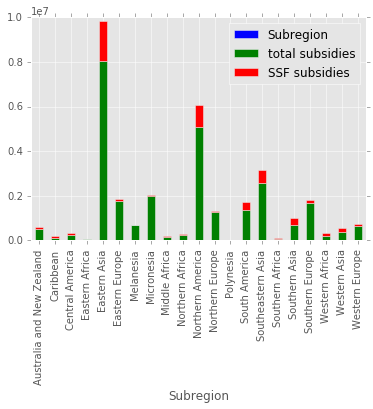

In [329]:
SSF_subsidies_subregions1.plot(kind='bar', stacked=True)

In [330]:
SSF_subsidies_regions = SSF_subsidies_estimates_assessed.groupby(['RegionName']).sum()

In [331]:
SSF_subsidies_regions1 = SSF_subsidies_regions.loc[:,['RegionName','total subsidies','SSF subsidies']]

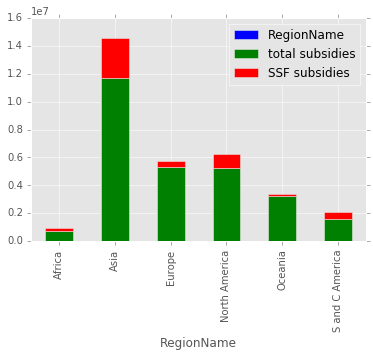

In [332]:
SSF_subsidies_regions1.plot(kind='bar', stacked=True)

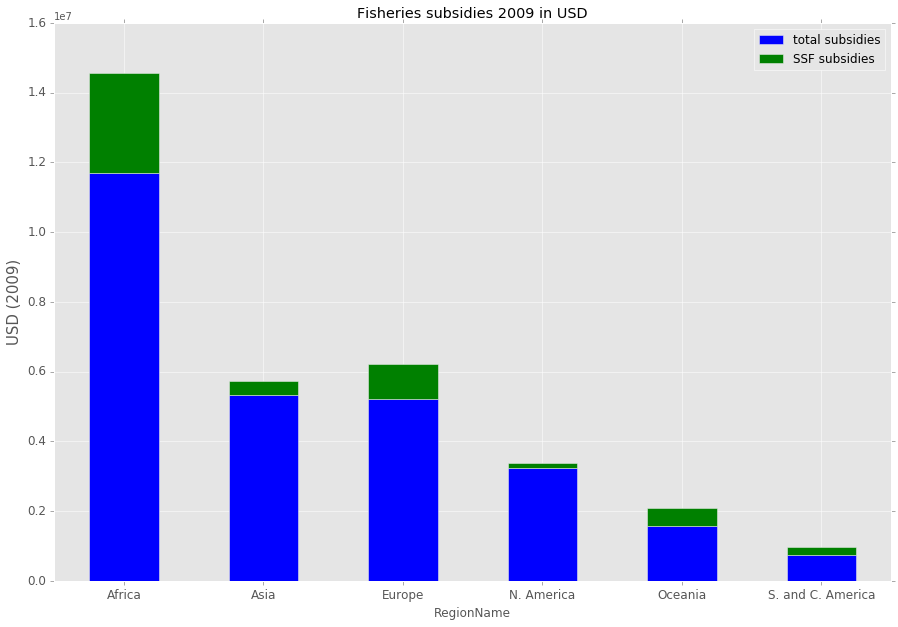

In [435]:
ax = SSF_subsidies_regions[['total subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies 2009 in USD",stacked = True, figsize=(15,10),legend=True, fontsize=12)

ax.set_ylabel("USD (2009)",fontsize=15)
labels=ax.set_xticklabels(['Africa','Asia','Europe','N. America','Oceania','S. and C. America'],rotation=360)

plt.show()

In [334]:
SSF_subsidies_regions = SSF_subsidies_regions.sort_values(by=['total subsidies'],ascending=False)

In [335]:
SSF_subsidies_regions['SSF percent per region'] = SSF_subsidies_regions['SSF subsidies']/SSF_subsidies_regions['total subsidies']*100

In [336]:
SSF_subsidies_regions['SSF percent per region']

RegionName
Asia               24.320787
Europe              7.808365
North America      19.120420
Oceania             4.351885
S and C America    32.175351
Africa             32.485492
Name: SSF percent per region, dtype: float64

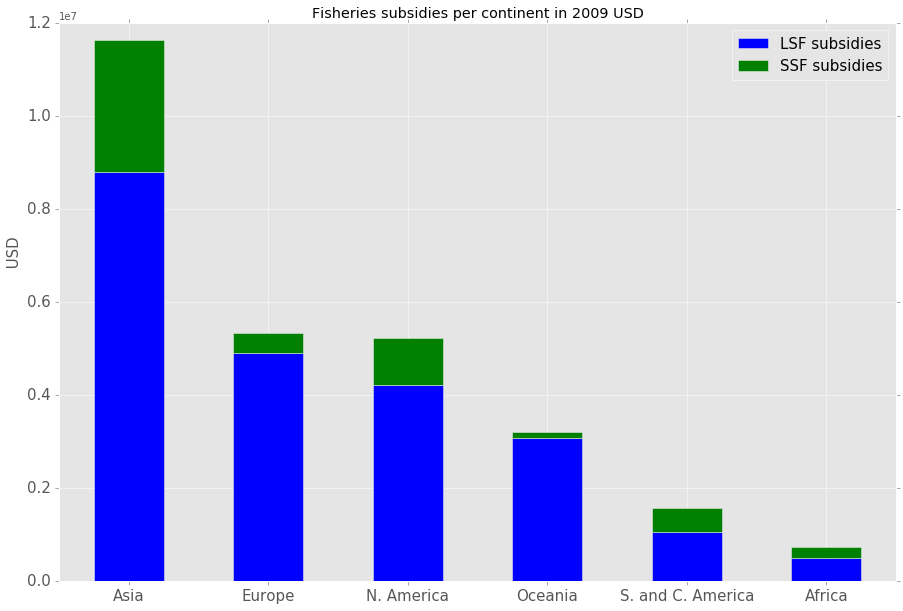

In [434]:
ax = SSF_subsidies_regions[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies per continent in 2009 USD", figsize=(15,10),stacked=True, legend=True, fontsize=15)
ax.set_ylabel("                     USD",fontsize=15)
ax.set_xlabel(" ")
plt.legend(loc='best',fontsize=15)
labels=ax.set_xticklabels(['Asia','Europe','N. America','Oceania','S. and C. America','Africa'],rotation=360)
plt.savefig('Subsidies_Continents.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Continents.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [338]:
Subsidies_per_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType']).sum()

In [339]:
Subsidies_per_subtype = Subsidies_per_subtype.sort_values(by=['total subsidies'],ascending=False)

In [340]:
Subsidies_per_subtype['SSF subsidies']

SubType
Fisheries mangt.             1838869.689217
Fishing port develop.         721551.333897
Boat constsruct. & renov.     502472.772886
Fishery R&D                   586440.470801
Markt. & storage infrast.     182531.752292
Vessel buyback                  3483.168888
Fisher assistance             478174.766724
MPAs                          271039.484501
Tax exemption                 147164.690146
Fisheries dev. projects       271515.713462
Fishing access                  2772.689895
Rural fisher communities      140252.412739
Name: SSF subsidies, dtype: float64

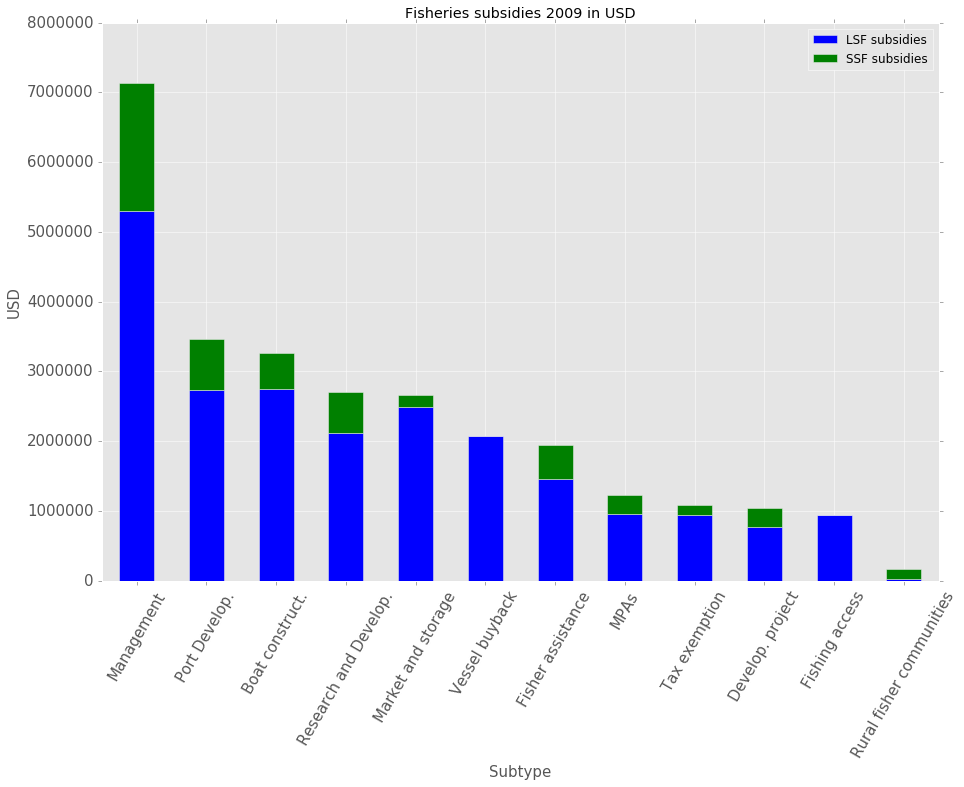

In [341]:
ax = Subsidies_per_subtype[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies 2009 in USD", figsize=(15,10),stacked=True, legend=True, fontsize=15)
ax.set_ylabel("USD",fontsize=15)
ax.set_xlabel("Subtype",fontsize=15)
labels=ax.set_xticklabels(['Management','Port Develop.','Boat construct.','Research and Develop.','Market and storage','Vessel buyback','Fisher assistance','MPAs','Tax exemption','Develop. project','Fishing access','Rural fisher communities'],rotation=60)
plt.show()

In [342]:
Subsidies_category_subtype = SSF_subsidies_estimates_assessed.groupby(['Category','SubType']).sum()

In [343]:
Subsidies_category_subtype = Subsidies_category_subtype.loc[:,['LSF subsidies','SSF subsidies']]

In [344]:
Subsidies_category_subtype_transposed = Subsidies_category_subtype.transpose()

In [345]:
Subsidies_category_subtype_transposed

Category              Ambiguous                                           \
SubType       Fisher assistance Rural fisher communities  Vessel buyback   
LSF subsidies    1461976.882041             19172.193342  2074451.044869   
SSF subsidies     478174.766724            140252.412739     3483.168888   

Category            Beneficial                                 \
SubType       Fisheries mangt.     Fishery R&D           MPAs   
LSF subsidies   5291066.380491  2110301.270611  956643.578333   
SSF subsidies   1838869.689217   586440.470801  271039.484501   

Category             Capacity-enhancing                          \
SubType       Boat constsruct. & renov. Fisheries dev. projects   
LSF subsidies            2752806.180759           766069.561453   
SSF subsidies             502472.772886           271515.713462   

Category                                                                      \
SubType       Fishing access Fishing port develop. Markt. & storage infrast.   
LSF subsidies  934505.963324        2736278.891287            2483920.756849   
SSF subsidies    2772.689895         721551.333897             182531.752292   

Category                      
SubType        Tax exemption  
LSF subsidies  941140.648236  
SSF subsidies  147164.690146

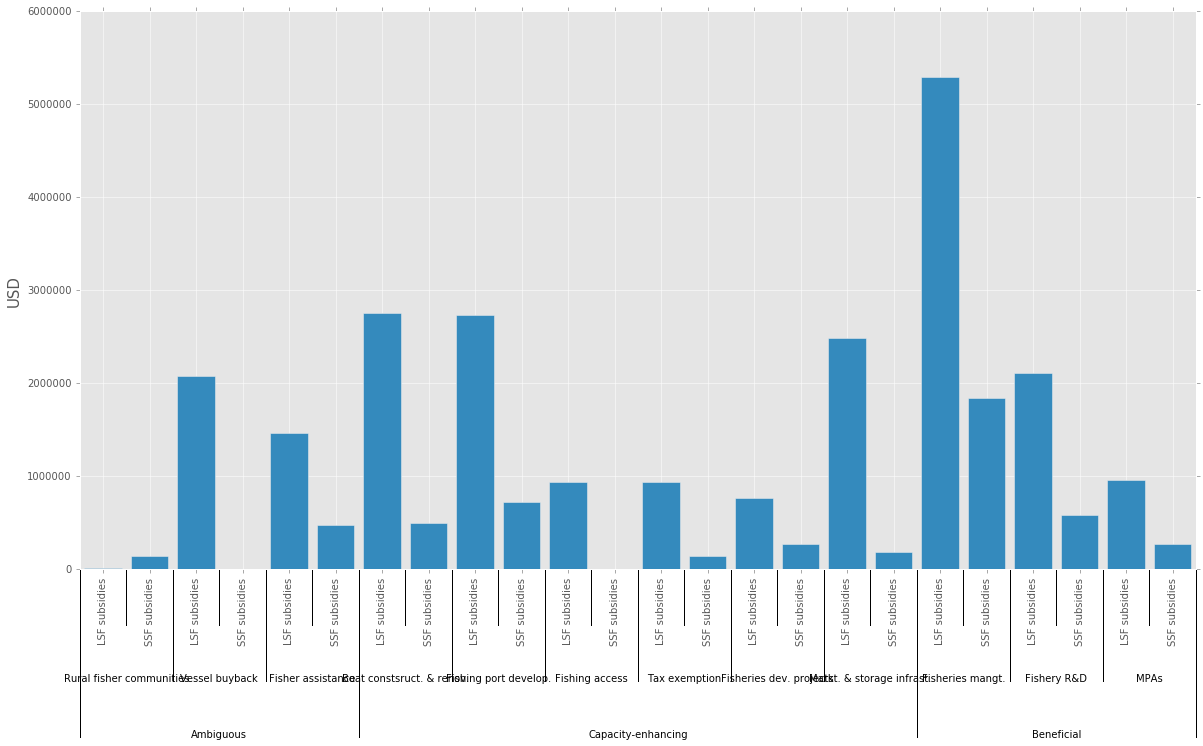

In [351]:
# source: sam clarke
def transform_group_data(data):
    '''
    Funtion for creating a three-level dict 
    from a two-level dict with two-tuple as key.
    '''
    transformed_data = {}
    for k, v in data.items():
        if k[0] in transformed_data.keys():
            transformed_data[k[0]][k[1]] = v
        else:
            transformed_data[k[0]] = {k[1]: v}
    return transformed_data
    
    
# source:  http://stackoverflow.com/questions/19184484/how-to-add-group-labels-for-bar-charts-in-matplotlib
def mk_groups(data):
    try:
        newdata = data.items()
    except:
        return

    thisgroup = []
    groups = []
    for key, value in newdata:
        newgroups = mk_groups(value)
        if newgroups is None:
            thisgroup.append((key, value))
        else:
            thisgroup.append((key, len(newgroups[-1])))
            if groups:
                groups = [g + n for n, g in zip(newgroups, groups)]
            else:
                groups = newgroups
    return [thisgroup] + groups

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_group_bar(ax, data):
    groups = mk_groups(data)
    xy = groups.pop()
    x, y = zip(*xy)
    ly = len(y)
    xticks = range(1, ly + 1)

    ax.bar(xticks, y, align='center')
    ax.set_xticks(xticks)
    ax.set_xticklabels(x, rotation=90)
    ax.set_xlim(.5, ly + .5)
    ax.yaxis.grid(True)

    scale = 1. / ly
    for pos in xrange(ly + 1):
        add_line(ax, pos * scale, -.1)
    ypos = -.2
    while groups:
        group = groups.pop()
        pos = 0
        for label, rpos in group:
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1
        
# group the data        
group_data = Subsidies_category_subtype_transposed.to_dict()

# transform the data from two-level three-level dict
transformed_data = transform_group_data(group_data)

# configure plot
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,1,1)


# plot
label_group_bar(ax, transformed_data)


# not sure what this does.... 
# fig.subplots_adjust(bottom=0.3)

# TODO: rotate label axis!
ax.set_ylabel("USD",fontsize=15)



In [347]:
transformed_data

{'Ambiguous': {'Fisher assistance': {'LSF subsidies': 1461976.8820411996,
   'SSF subsidies': 478174.76672412478},
  'Rural fisher communities': {'LSF subsidies': 19172.193342417449,
   'SSF subsidies': 140252.41273913364},
  'Vessel buyback': {'LSF subsidies': 2074451.0448688618,
   'SSF subsidies': 3483.1688880456272}},
 'Beneficial': {'Fisheries mangt.': {'LSF subsidies': 5291066.3804910639,
   'SSF subsidies': 1838869.6892172887},
  'Fishery R&D': {'LSF subsidies': 2110301.2706111157,
   'SSF subsidies': 586440.47080104146},
  'MPAs': {'LSF subsidies': 956643.57833284535,
   'SSF subsidies': 271039.48450104753}},
 'Capacity-enhancing': {'Boat constsruct. & renov.': {'LSF subsidies': 2752806.1807585061,
   'SSF subsidies': 502472.77288635977},
  'Fisheries dev. projects': {'LSF subsidies': 766069.56145347178,
   'SSF subsidies': 271515.71346197359},
  'Fishing access': {'LSF subsidies': 934505.96332426183,
   'SSF subsidies': 2772.6898951225821},
  'Fishing port develop.': {'LSF sub

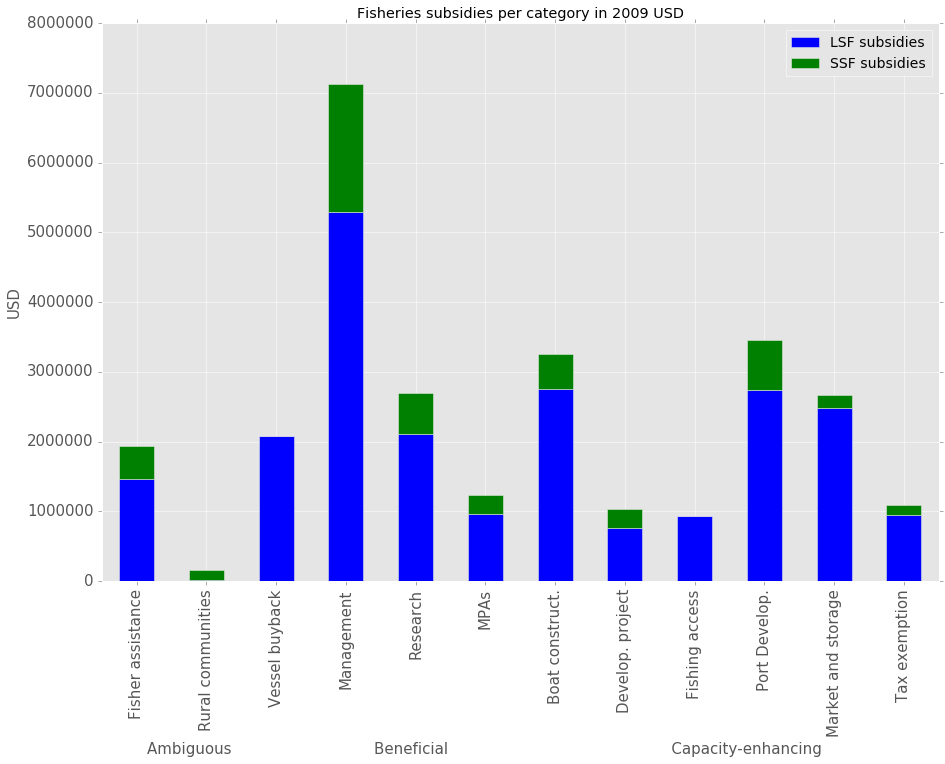

In [424]:
fig = plt.figure()
ax = Subsidies_category_subtype[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies per category in 2009 USD", figsize=(15,10),stacked=True, legend=True, fontsize=15)
ax.set_ylabel("USD",fontsize=15)
ax.set_xlabel("Ambiguous                              Beneficial                                               Capacity-enhancing               ",fontsize=15,)
labels=ax.set_xticklabels(['Fisher assistance','Rural communities','Vessel buyback', 'Management', 'Research', 'MPAs', 'Boat construct.', 'Develop. project', 'Fishing access', 'Port Develop.', 'Market and storage', 'Tax exemption'],rotation=90)
plt.legend(loc='best',fontsize=14)
plt.savefig('Subsidies_Category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Category.pdf', dpi=400, bbox_inches='tight')
plt.show()


In [353]:
Subsidies_category_subtype.sort_values(by=['LSF subsidies'],ascending=False)

LSF subsidies   SSF subsidies
Category           SubType                                                  
Beneficial         Fisheries mangt.           5291066.380491  1838869.689217
Capacity-enhancing Boat constsruct. & renov.  2752806.180759   502472.772886
                   Fishing port develop.      2736278.891287   721551.333897
                   Markt. & storage infrast.  2483920.756849   182531.752292
Beneficial         Fishery R&D                2110301.270611   586440.470801
Ambiguous          Vessel buyback             2074451.044869     3483.168888
                   Fisher assistance          1461976.882041   478174.766724
Beneficial         MPAs                        956643.578333   271039.484501
Capacity-enhancing Tax exemption               941140.648236   147164.690146
                   Fishing access              934505.963324     2772.689895
                   Fisheries dev. projects     766069.561453   271515.713462
Ambiguous          Rural fisher communities     19172.193342   140252.412739

In [ ]:
Subsidies_per_Category = SSF_subsidies_estimates_assessed.groupby(['Category']).sum()

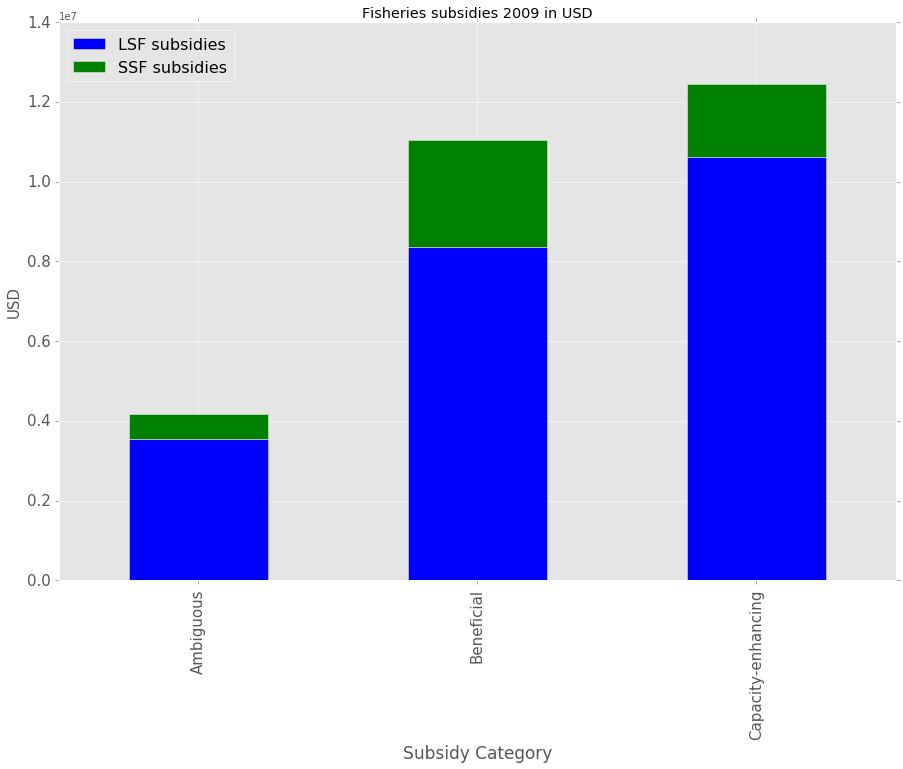

In [454]:
ax = Subsidies_per_Category[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies 2009 in USD", figsize=(15,10),stacked=True, legend=True, fontsize=15)
ax.set_ylabel("USD",fontsize=15)
ax.set_xlabel("Subsidy Category",fontsize=17)
plt.legend(loc=2,fontsize=16)

plt.show()